In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [4]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y_binary, test_size=0.2, random_state=42)


In [8]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [10]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 73.03%


In [11]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



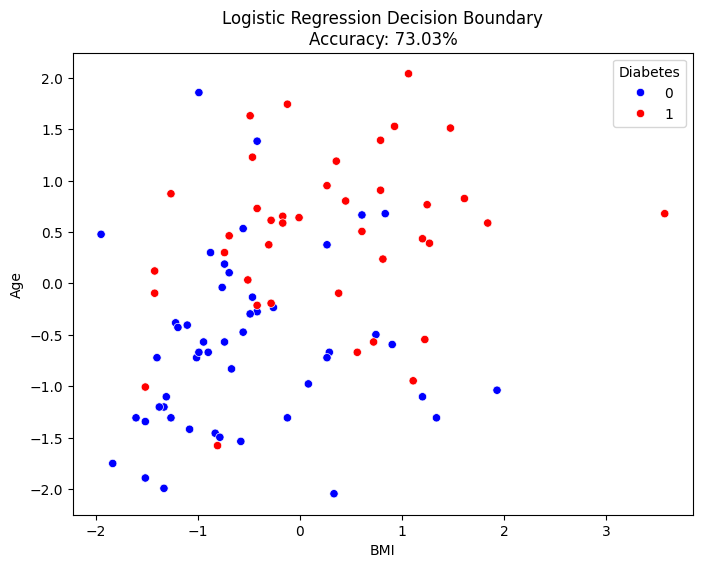

In [12]:
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
				0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
	accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()


# multiclass classification using Logistic Regression

In [13]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = sns.load_dataset('iris')

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [17]:
df = df[['sepal_length','petal_length','species']]

In [18]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [19]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
clf = LogisticRegression(multi_class='ovr')

In [22]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [23]:
y_pred = clf.predict(X_test)

In [24]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [25]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.44391859, 0.55507579, 0.00100562]])

In [26]:
clf.predict(query)

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


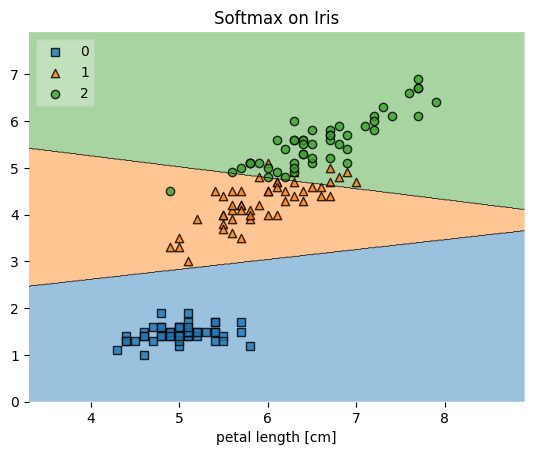

In [27]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()

In [28]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
clf = LogisticRegression(multi_class='multinomial')

In [31]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [32]:
y_pred = clf.predict(X_test)

In [33]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [34]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [35]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [36]:
clf.predict(query)

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


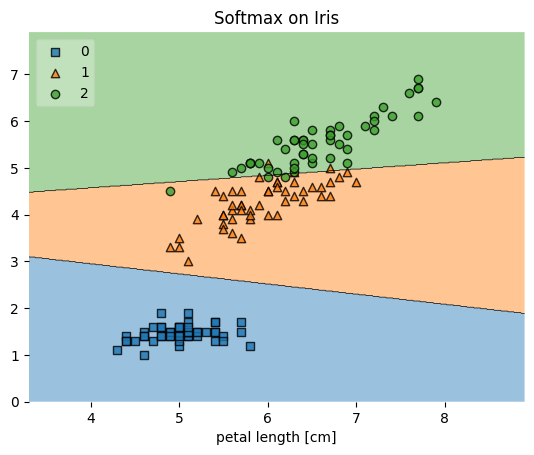

In [37]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()